In [1]:
library(tidyverse) 
library(plyr)
library(dplyr)
library(ggplot2)
library(splitstackshape)
data <- read_csv('../input/marketcategory/marketcategory.csv')
data<- as.data.frame(data)
options(repr.plot.width = 14, repr.plot.height = 8)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:purrr’:

    compact


Warning message:
“Missing column n

In [2]:
data

X1,SerialNo,description,currencyAmount,originationDateTime,customerId,merchantId,categoryTags,id,gender,birthDate,occupationIndustry,totalIncome,relationshipStatus,habitationStatus,balance,Age,AgeGroup
<dbl>,<dbl>,<chr>,<dbl>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
0,0,ADP PMT 59964899,1092.22,2018-06-28,fe51c153-fbec-4b64-9b00-2530035ef0e1_fa967441-a20a-4279-a733-c38ae7d58f4c,NA,Income,fe51c153-fbec-4b64-9b00-2530035ef0e1_fa967441-a20a-4279-a733-c38ae7d58f4c,Female,1969-11-21,6220 Hospitals (6221 to 6223),28397.60,Married,With Spouse,28283.09,48,40-50
1,1,ADP PMT 78870688,701.11,2018-06-28,fe51c153-fbec-4b64-9b00-2530035ef0e1_ee129e70-428d-4585-b39c-34df2609fdb7,NA,Income,fe51c153-fbec-4b64-9b00-2530035ef0e1_ee129e70-428d-4585-b39c-34df2609fdb7,Male,1995-06-10,"2211 Electric power generation, transmission and distribution",18228.87,Single,With Spouse,9432.24,23,20-30
2,2,ROGERS CABLE E2I6X9,111.98,2018-04-30,fe51c153-fbec-4b64-9b00-2530035ef0e1_ad635ae8-6ce0-4a3e-b61e-0aac395fd813,3d99af81-c081-4d73-bc44-d3a8e639b22a,Bills and Utilities,fe51c153-fbec-4b64-9b00-2530035ef0e1_ad635ae8-6ce0-4a3e-b61e-0aac395fd813,Female,1970-09-17,5221 Depository credit intermediation,42524.90,Divorced,With Spouse,33204.10,47,40-50
3,3,TIM HORTONS #990 _F,1.16,2018-10-09,fe51c153-fbec-4b64-9b00-2530035ef0e1_12bd4e47-03ca-4af1-9820-a77eb422a316,7cc23aa6-0671-4c44-a1b5-b8a98d4bc5d4,Food and Dining,fe51c153-fbec-4b64-9b00-2530035ef0e1_12bd4e47-03ca-4af1-9820-a77eb422a316,Male,1999-07-13,NA,0.00,Single,With Parent,101.75,19,10-20
4,4,EMAIL TFR C0***oHp,41.00,2018-07-05,fe51c153-fbec-4b64-9b00-2530035ef0e1_fb97a9de-ab69-44a5-bac1-82399d88e685,NA,Transfer,fe51c153-fbec-4b64-9b00-2530035ef0e1_fb97a9de-ab69-44a5-bac1-82399d88e685,Male,1982-09-16,5615 Travel arrangement and reservation services,34359.00,Single,With Parent,39127.80,35,30-40
5,5,ROGERS CABLE L8Q8R8,118.47,2018-08-13,fe51c153-fbec-4b64-9b00-2530035ef0e1_454f2e57-b4a5-43b9-a6b9-dd65e1c19857,3d99af81-c081-4d73-bc44-d3a8e639b22a,Bills and Utilities,fe51c153-fbec-4b64-9b00-2530035ef0e1_454f2e57-b4a5-43b9-a6b9-dd65e1c19857,Female,1993-01-30,"5419 Other professional, scientific and technical services",20163.99,Married,With Spouse,9652.63,25,20-30
6,6,TIM HORTONS #969 _F,1.84,2018-05-31,fe51c153-fbec-4b64-9b00-2530035ef0e1_b69627c2-4e69-4c49-bdb7-23025a3996ff,4b8c0e28-ce06-464a-8e00-d80c3ba4a001,Food and Dining,fe51c153-fbec-4b64-9b00-2530035ef0e1_b69627c2-4e69-4c49-bdb7-23025a3996ff,Female,1998-07-11,7221 Full-service restaurants,21383.01,Single,With Spouse,18950.00,19,10-20
7,7,EMTFR C0***mKz,200.00,2018-04-02,fe51c153-fbec-4b64-9b00-2530035ef0e1_ccf2df20-db74-4ff4-9e6d-fa939def4f48,NA,Transfer,fe51c153-fbec-4b64-9b00-2530035ef0e1_ccf2df20-db74-4ff4-9e6d-fa939def4f48,Female,1942-02-27,Retired,51102.80,Married,With Spouse,41211.49,76,70+
8,8,BELL CANADA R7F8L1,81.25,2018-07-26,fe51c153-fbec-4b64-9b00-2530035ef0e1_473dcf0b-9f2a-4388-abc4-8b674df043bc,338b9026-ebdd-4f32-8e01-4a46572b0d65,Bills and Utilities,fe51c153-fbec-4b64-9b00-2530035ef0e1_473dcf0b-9f2a-4388-abc4-8b674df043bc,Other,1991-04-04,5221 Depository credit intermediation,9870.30,Single,With Spouse,7010.41,27,20-30


`summarise()` ungrouping output (override with `.groups` argument)

Saving 12.5 x 6.67 in image



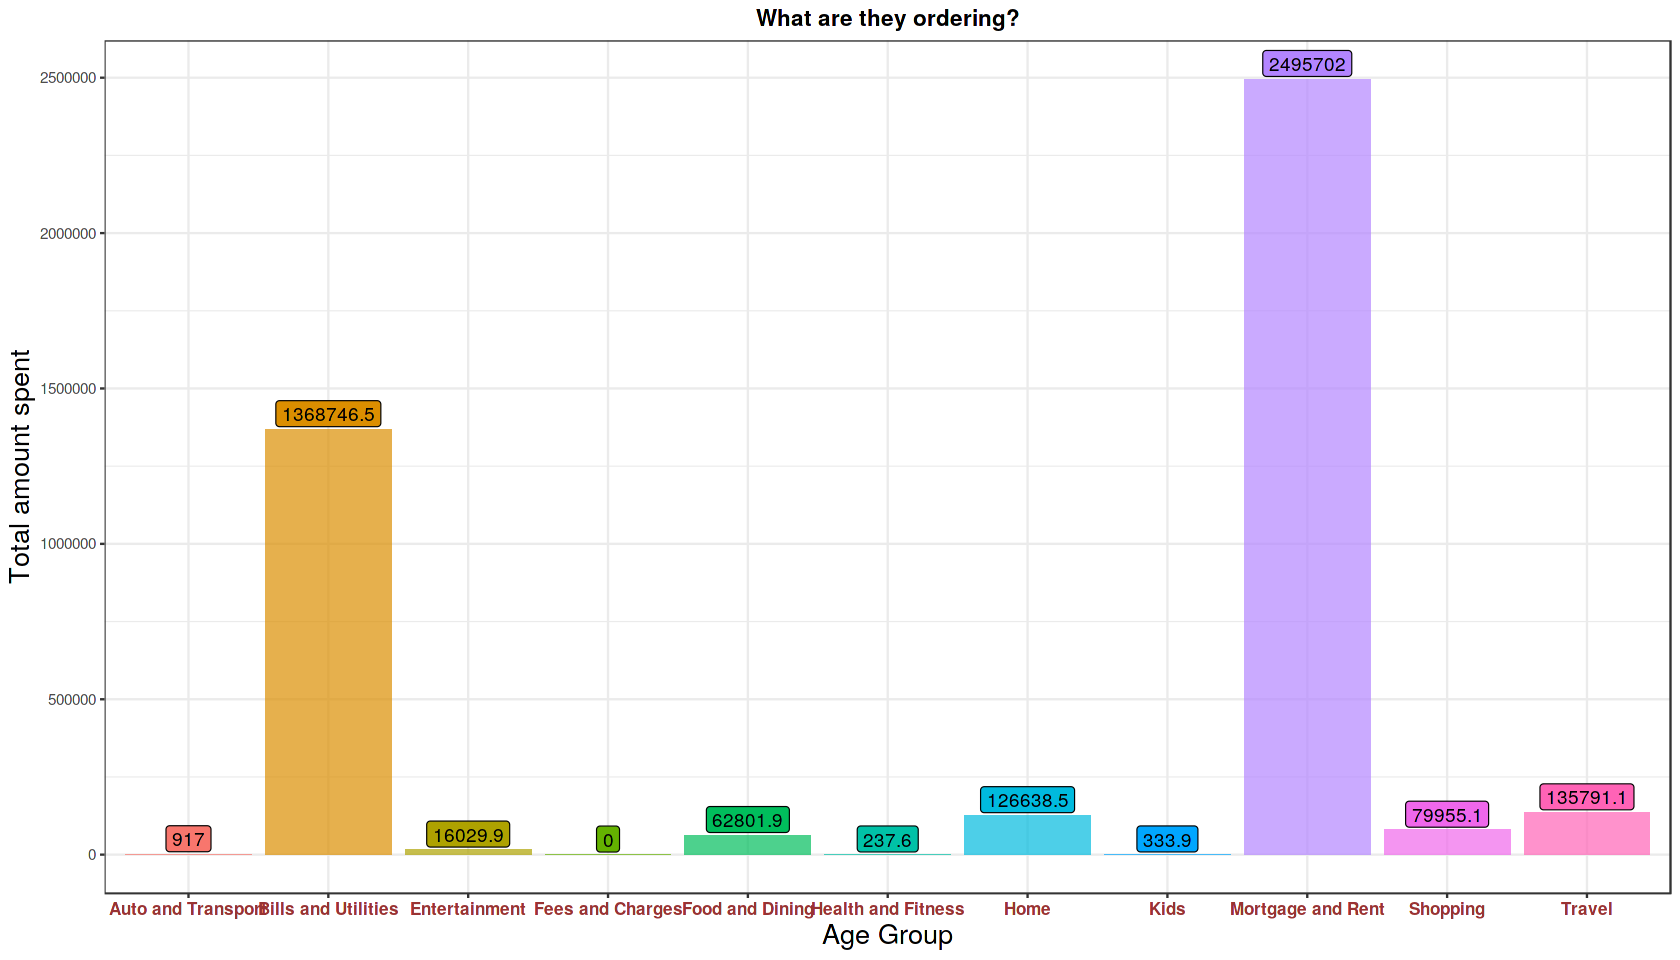

In [3]:
all_categories=filter(data,categoryTags !="Income" & categoryTags !="Transfer" & categoryTags !="Taxes")
g1<-all_categories %>%select(categoryTags,currencyAmount)%>%
group_by(categoryTags)%>%dplyr::summarise(total=round(sum(currencyAmount),1))%>%
  ggplot(aes(x = categoryTags,y=total,fill = categoryTags))+
  geom_bar(stat='identity',alpha = 0.7)+
  geom_label(aes(label = total),vjust = -0.1, show.legend = F)+theme_bw()+
  labs(x='Age Group', y = "Total amount spent", title = "What are they ordering?")+
        theme(plot.title = element_text(hjust = 0.5, face = "bold"),axis.text.x=element_text(face="bold", color="#993333", size=10),
             axis.title.x = element_text(size = 16),
             axis.title.y = element_text(size = 16),legend.position = "none")
g1
ggsave('g1.png')

`summarise()` regrouping output by 'AgeGroup' (override with `.groups` argument)

Saving 12.5 x 6.67 in image



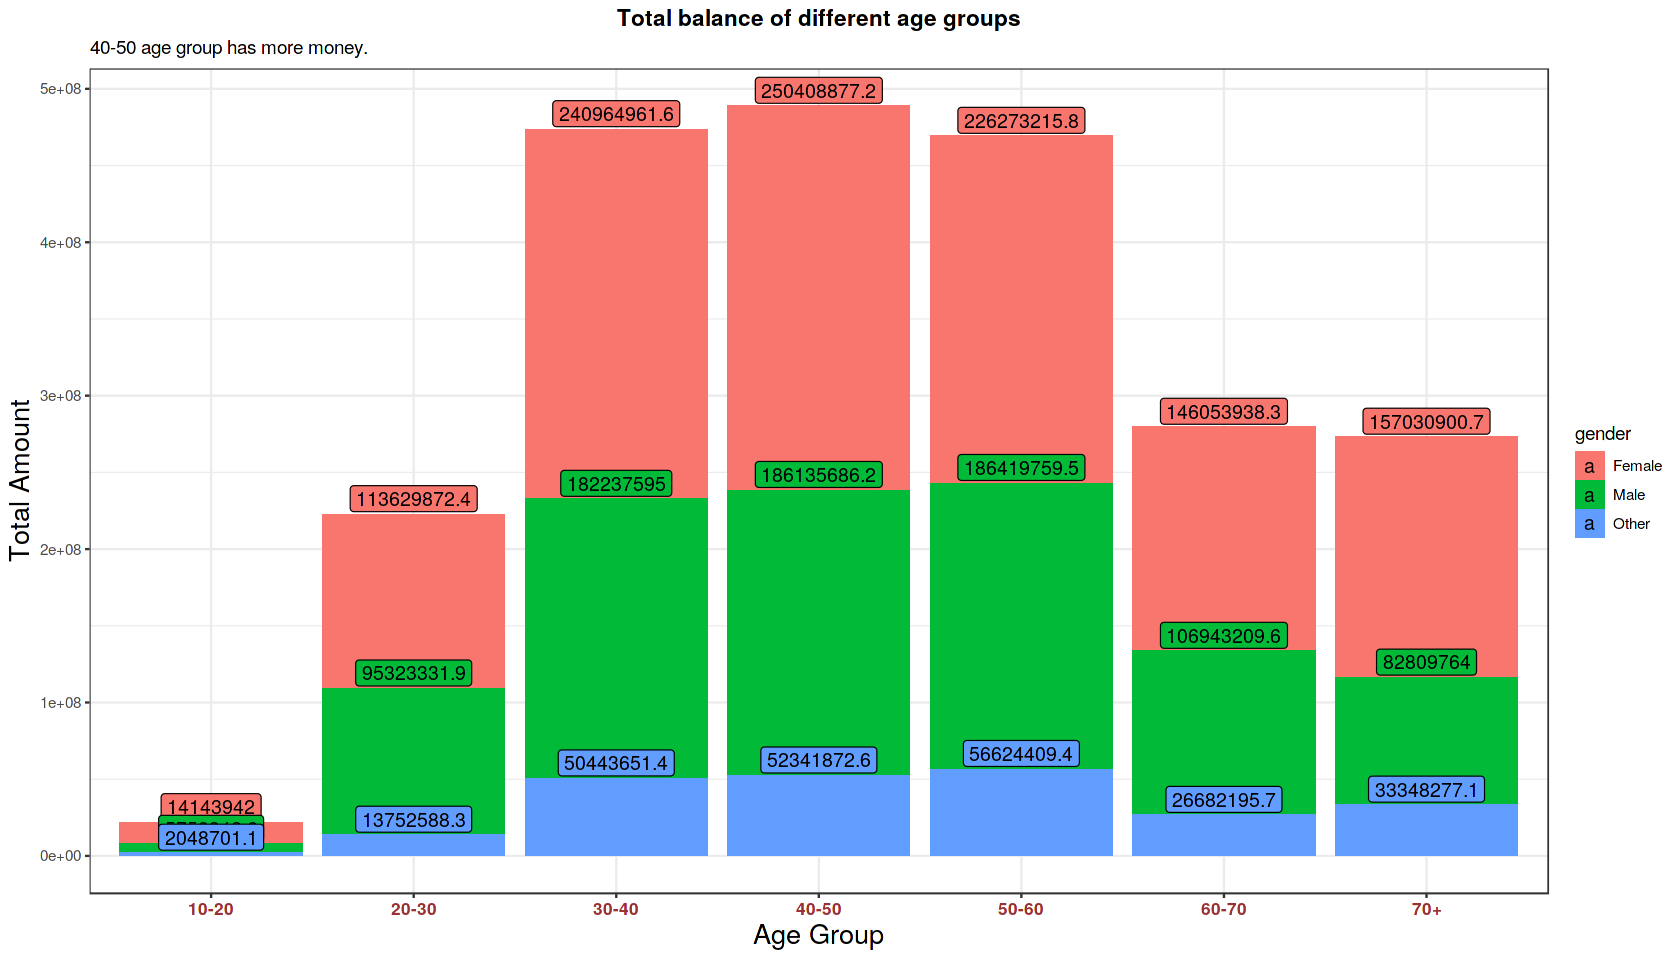

In [4]:
g2<-data %>%select(AgeGroup,balance,gender)%>%group_by(AgeGroup,gender)%>%dplyr::summarise(total=round(sum(balance),1))%>%
  ggplot(aes(x = AgeGroup, y = total, fill = gender))+geom_bar(stat='identity',position='stack')+
 geom_label(aes(label=total),position='stack',size=4,vjust=-0.1)+ theme_bw() +
  labs(x='Age Group', y = "Total Amount", title = "Total balance of different age groups",
       subtitle = "40-50 age group has more money.")+
        theme(plot.title = element_text(hjust = 0.5, face = "bold"),axis.text.x=element_text(face="bold", color="#993333", size=10),
             axis.title.x = element_text(size = 16),
             axis.title.y = element_text(size = 16))
g2
ggsave('g2.png')

`summarise()` regrouping output by 'AgeGroup' (override with `.groups` argument)

Saving 12.5 x 6.67 in image



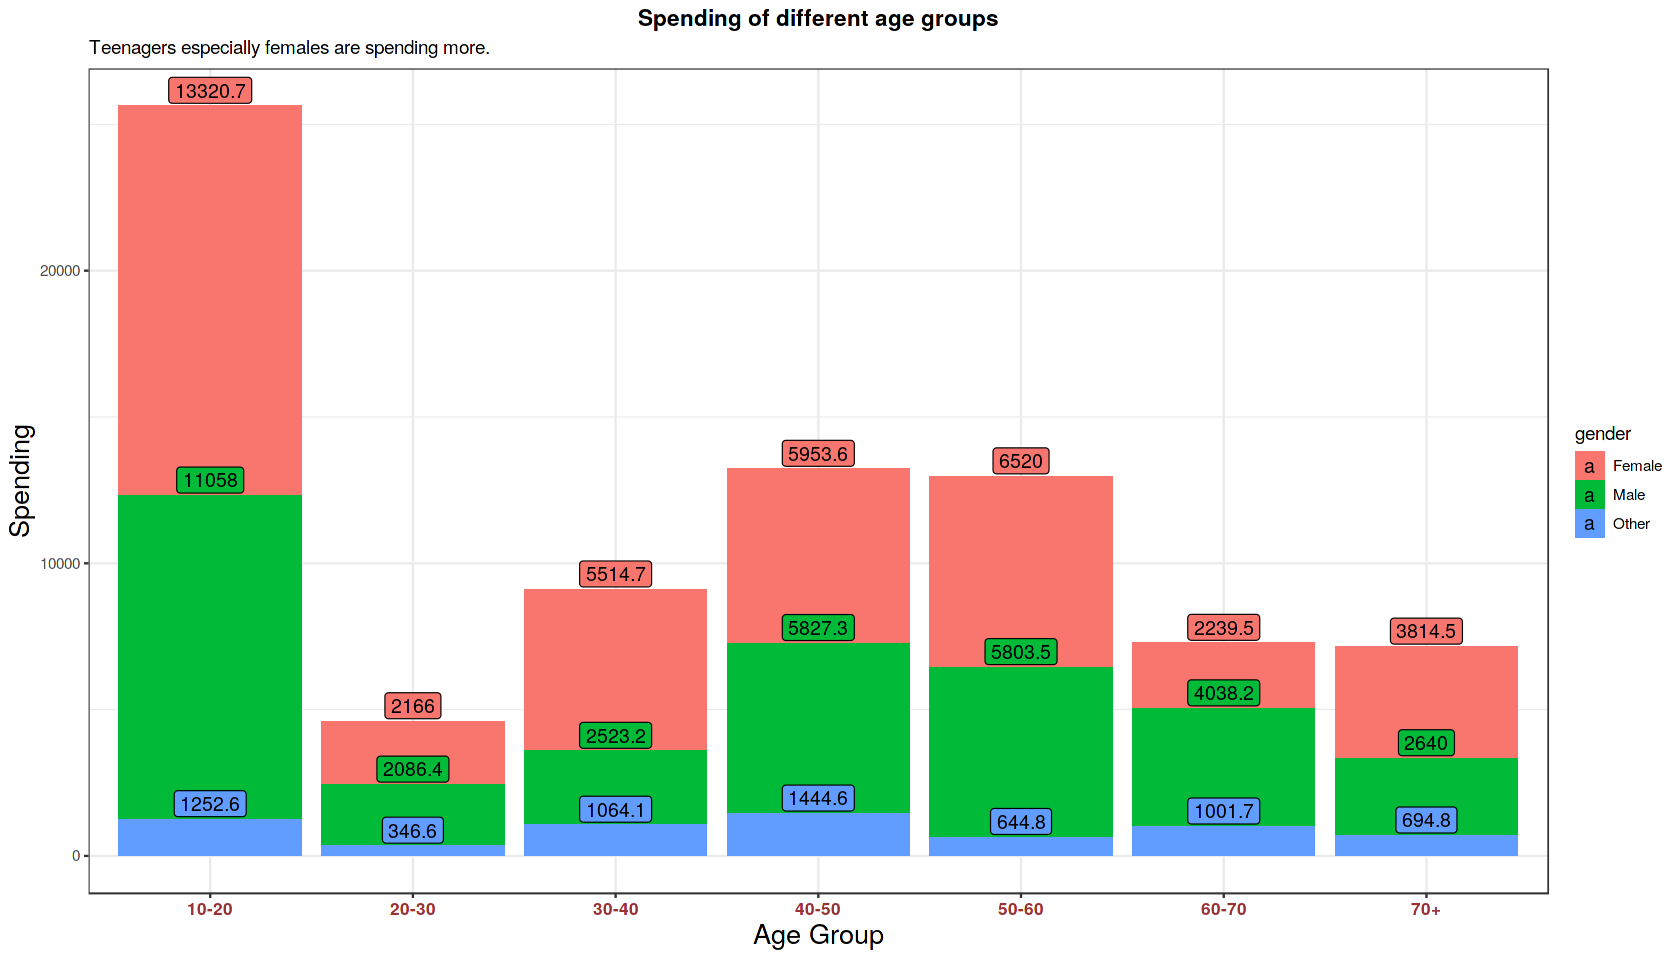

In [5]:
categories=filter(data,categoryTags =="Shopping")
g3<-categories %>%select(AgeGroup,currencyAmount,gender)%>%group_by(AgeGroup,gender)%>%dplyr::summarise(total=round(sum(currencyAmount),1))%>%
ggplot(aes(x = AgeGroup, y = total, fill = gender))+geom_bar(stat='identity',position='stack')+
geom_label(aes(x = AgeGroup, y = total, fill = gender,label=total),stat='identity',position='stack',size=4,vjust=-0.1)+ theme_bw() +
labs(x='Age Group', y = "Spending",title = "Spending of different age groups",
       subtitle = "Teenagers especially females are spending more.")+
        theme(plot.title = element_text(hjust = 0.5, face = "bold"),axis.text.x=element_text(face="bold", color="#993333", size=10),
             axis.title.x = element_text(size = 16),
             axis.title.y = element_text(size = 16))
g3
ggsave('g3.png')

Saving 12.5 x 6.67 in image



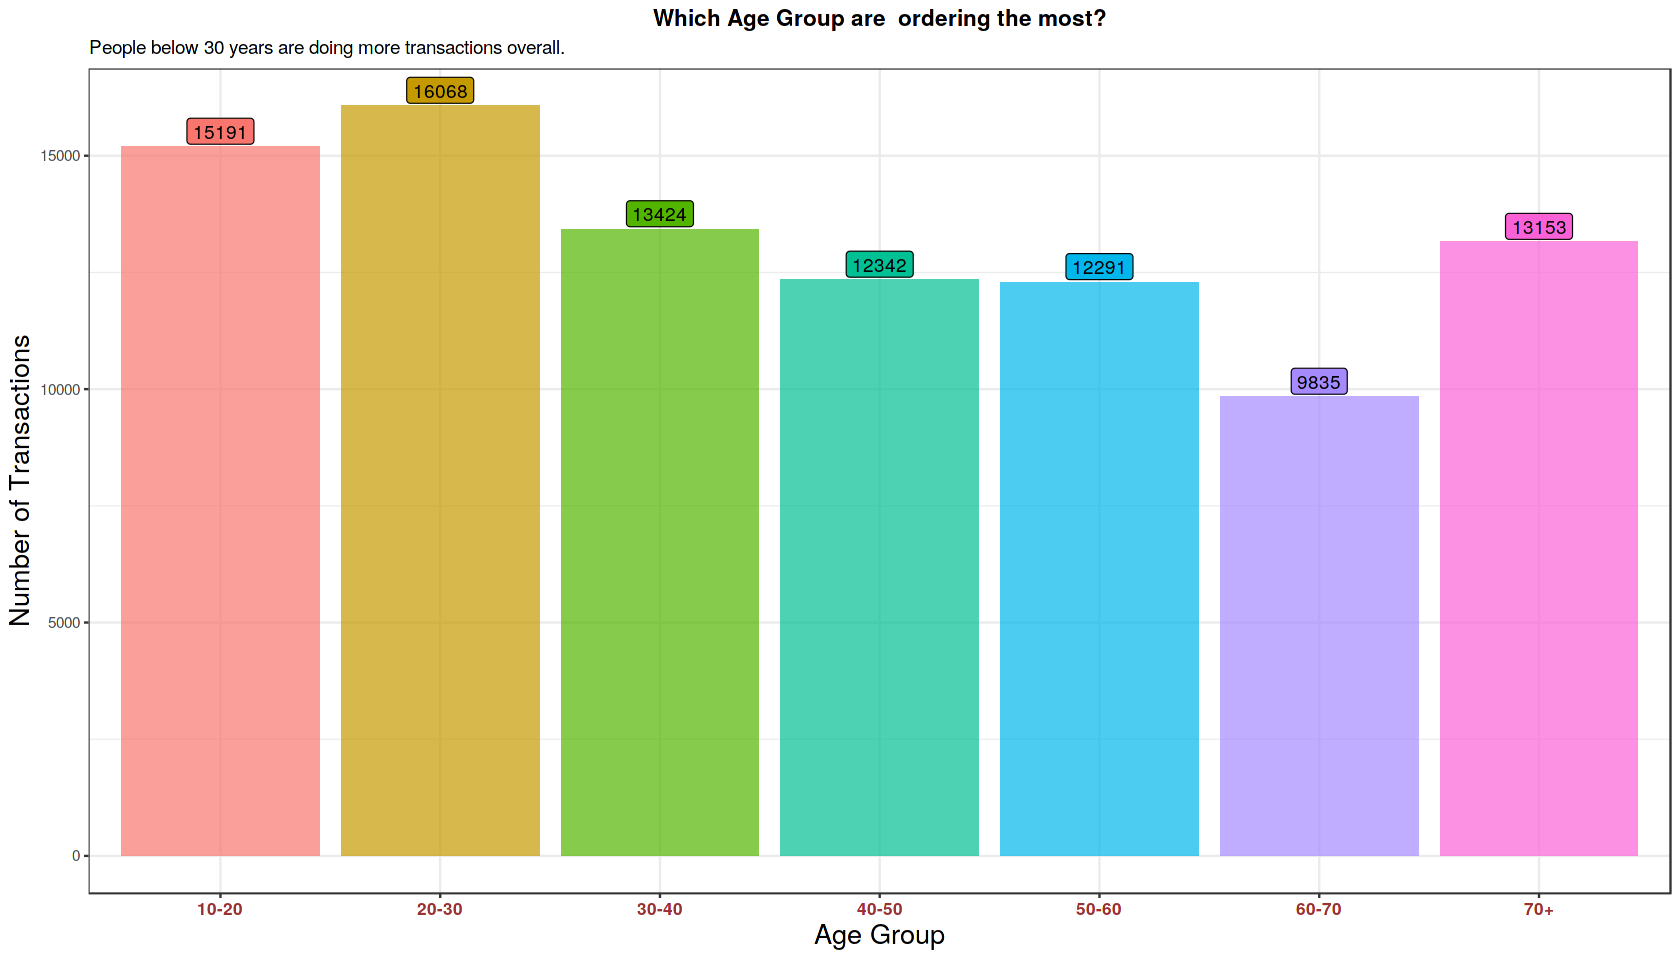

In [6]:
 g4<-data %>% group_by(AgeGroup) %>%
  ggplot(aes(x = AgeGroup, fill = AgeGroup))+
  geom_bar(alpha = 0.7)+
  geom_label(aes(label = ..count..),stat='count', vjust = -0.1, show.legend = F)+theme_bw()+
  labs(x='Age Group', y = "Number of Transactions", title = "Which Age Group are  ordering the most?",
       subtitle = "People below 30 years are doing more transactions overall.")+
        theme(plot.title = element_text(hjust = 0.5, face = "bold"),axis.text.x=element_text(face="bold", color="#993333", size=10),
             axis.title.x = element_text(size = 16),
             axis.title.y = element_text(size = 16),legend.position = "none")
g4
ggsave('g4.png') 

Saving 12.5 x 6.67 in image



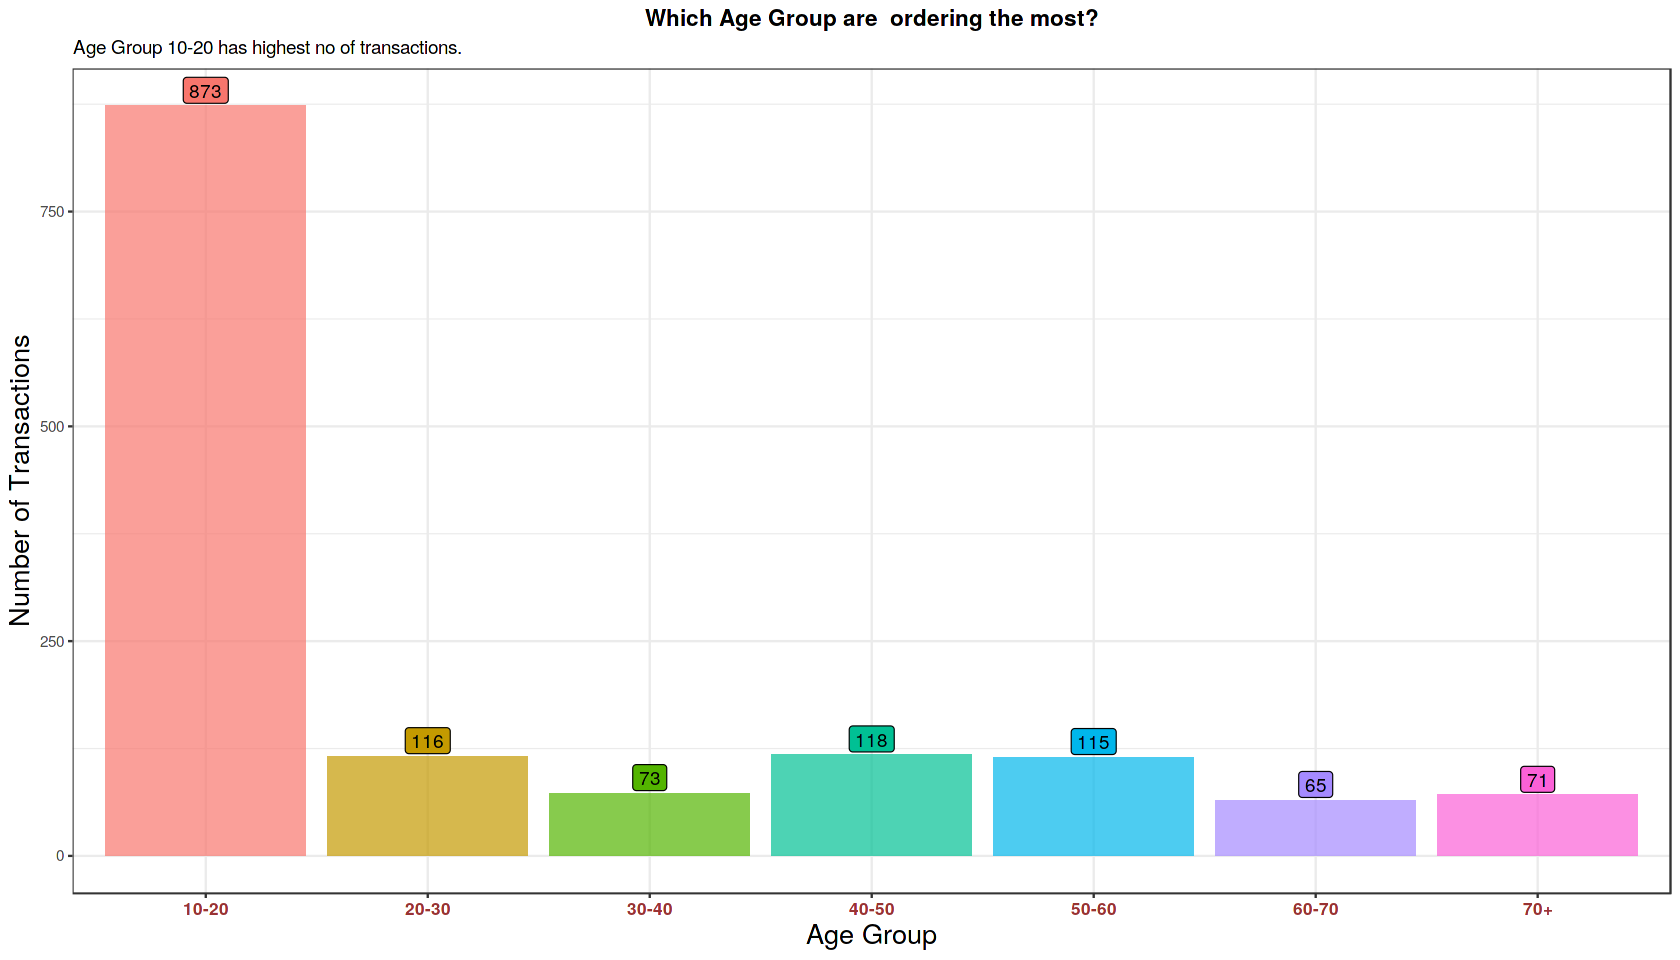

In [7]:
 g5<-categories %>% group_by(AgeGroup) %>%
  ggplot(aes(x = AgeGroup, fill = AgeGroup))+
  geom_bar(alpha = 0.7)+
  geom_label(aes(label = ..count..),stat='count', vjust = -0.1, show.legend = F)+theme_bw()+
  labs(x='Age Group', y = "Number of Transactions", title = "Which Age Group are  ordering the most?",
       subtitle = "Age Group 10-20 has highest no of transactions.")+
        theme(plot.title = element_text(hjust = 0.5, face = "bold"),axis.text.x=element_text(face="bold", color="#993333", size=10),
             axis.title.x = element_text(size = 16),
             axis.title.y = element_text(size = 16),legend.position = "none")
g5
ggsave('g5.png')